# Example Usage: Titanic Dataset

An example of training a model on the titanic dataset.

The name of the package is **pandas-learn**, a mixing *pandas* into *scikit-learn*.  Therefore, you should always use pandas to handle your data if you are using the package(!):

In [1]:
import pandas as pd
%matplotlib inline

pandas-learn has an identical module structure to scikit-learn, so you already know where to find all the models you already use:

In [2]:
from pdlearn.ensemble import RandomForestClassifier

You can use pandas to manipulate your data with ease:

In [3]:
data = pd.read_csv('titanic-train.csv')                   \
                 .append(pd.read_csv('titanic-test.csv')) \
                 .set_index('name')
        
data['sex'] = data.sex == 'male'
data['child'] = data.age.fillna(20) < 15
X = data[['sex', 'p_class', 'child']].astype(int)
y = data['survived']

train = y.notnull()

In [4]:
X.head(10)

,sex,p_class,child
name,,,
"Braund, Mr. Owen Harris",1,3,0
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,1,0
"Heikkinen, Miss. Laina",0,3,0
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0
"Allen, Mr. William Henry",1,3,0
"Moran, Mr. James",1,3,0
"McCarthy, Mr. Timothy J",1,1,0
"Palsson, Master. Gosta Leonard",1,3,1
"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,3,0


(Just in case you are wondering, Mrs. Nasser was apparently 14, so was in fact a child despite being married!).

In [5]:
y.head(10)

name
Braund, Mr. Owen Harris                                0
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Allen, Mr. William Henry                               0
Moran, Mr. James                                       0
McCarthy, Mr. Timothy J                                0
Palsson, Master. Gosta Leonard                         0
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)      1
Nasser, Mrs. Nicholas (Adele Achem)                    1
Name: survived, dtype: float64

pandas-learn modules inherit directly from scikit learn models.  They have basically the same interface:

In [6]:
rf = RandomForestClassifier(n_estimators=500, criterion='gini')

When you fit to pandas data, it saves the feature and target names automatically:

In [7]:
rf.fit(X[train], y[train]);
print('Feature names: ', rf.feature_names_)
print('Target names:  ', rf.target_names_)

Feature names:  Index(['sex', 'p_class', 'child'], dtype='object')
Target names:   Index(['survived'], dtype='object')


In [8]:
rf.predict(X[~train]).head(10)

name
Kelly, Mr. James                                0
Wilkes, Mrs. James (Ellen Needs)                1
Myles, Mr. Thomas Francis                       0
Wirz, Mr. Albert                                0
Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1
Svensson, Mr. Johan Cervin                      0
Connolly, Miss. Kate                            1
Caldwell, Mr. Albert Francis                    0
Abrahim, Mrs. Joseph (Sophie Halaut Easu)       1
Davies, Mr. John Samuel                         0
Name: survived, dtype: float64

In [9]:
rf.predict_proba(X[~train]).head(10)

survived          
                                                     0         1
name                                                            
Kelly, Mr. James                              0.881033  0.118967
Wilkes, Mrs. James (Ellen Needs)              0.490276  0.509724
Myles, Mr. Thomas Francis                     0.918252  0.081748
Wirz, Mr. Albert                              0.881033  0.118967
Hirvonen, Mrs. Alexander (Helga E Lindqvist)  0.490276  0.509724
Svensson, Mr. Johan Cervin                    0.659940  0.340060
Connolly, Miss. Kate                          0.490276  0.509724
Caldwell, Mr. Albert Francis                  0.918252  0.081748
Abrahim, Mrs. Joseph (Sophie Halaut Easu)     0.490276  0.509724
Davies, Mr. John Samuel                       0.881033  0.118967

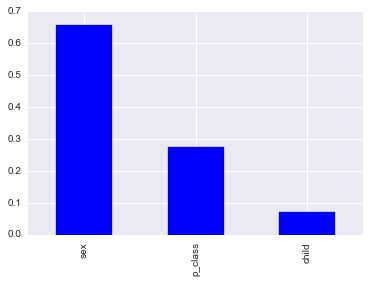

In [10]:
rf.feature_importances_.plot.bar()